<a href="https://colab.research.google.com/github/Eswa2020/team2_dcs6_loan_prediction/blob/main/Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Load dataset

In [ ]:
loans = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

> Check size

In [ ]:
loans.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0.0,NaN,9.0,14.0,Female,1.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0.0,17.0,12.0,24.0,Female,3.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0.0,NaN,12.0,16.0,Male,3.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3.0,NaN,16.0,22.0,Male,3.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1.0,NaN,19.0,30.0,Female,1.0


description 
deliwuency <- In a financial sense, delinquency occurs as soon as a borrower misses a payment on a loan. In contrast, default occurs when a borrower fails to repay the loan as specified in the original contract

In [ ]:
loans.shape

(164309, 14)

In [ ]:
loans.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

> A lot of null but cant be removed.

* Length employed <- Some borrowere may have not been previously employed
* Home owner <-
* Annual Income <- 
* Months since deliquency <- There are customers who are timely in their repayments hence their count could be empty since they havent while those at o months could be in a deliquent state but have not yet exceeded 1 month. It could be floored up to 0, however this would imply deliquent users and non deliquent users have the same level of deliquency. a bit problematic

In [ ]:
(loans['Months_Since_Deliquency']).mean()

34.22935598577637

In [ ]:
loans.duplicated().sum()

0

> No duplicates

In [ ]:
loans.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [ ]:
loans['Loan_Amount_Requested'] = loans['Loan_Amount_Requested'].str.replace(',', '')
loans['Loan_Amount_Requested'] = loans['Loan_Amount_Requested'].astype('int')

## Checking for annomalies

## Cleaning up

**Lenght employed**

**Deliquency**

In [ ]:
# Creating the classifications of the customers from 
def status(x):
  if x<=12.0:
    return 'Medium low risk'
  elif ((x>12.0) & (x<=30.0)):
    return 'Medium risk'
  elif ((x>30.0) & (x<=50.0)):
    return 'Medium high risk'
  elif ((x>50.0) & (x<=72.0)):
    return 'High risk'
  elif x>72.0:
    return 'Highest risk'
  else:
    return 'Low risk'

In [ ]:
loans['Risk_level']=loans.apply(lambda x: status(x['Months_Since_Deliquency']),axis=1)

In [ ]:
loans['Months_Since_Deliquency'].isna().sum()

88379

In [ ]:
loans['Risk_level'].value_counts()

Low risk            88379
Medium risk         22931
Medium high risk    20243
Medium low risk     14382
High risk           13572
Highest risk         4802
Name: Risk_level, dtype: int64

## Checking for Outliers

In [ ]:
sns.boxplot(loans['Loan_Amount_Requested'])

In [ ]:
sns.boxplot(x=loans['Annual_Income'])
sns.despine()

In [ ]:
sns.boxplot(x=loans['Months_Since_Deliquency'])

In [ ]:
sns.boxplot(x=loans['Number_Open_Accounts'])

In [ ]:
sns.boxplot(x=loans['Total_Accounts'])

#

In [ ]:
sns.set(rc={'figure.figsize':(12,6)},style="white")

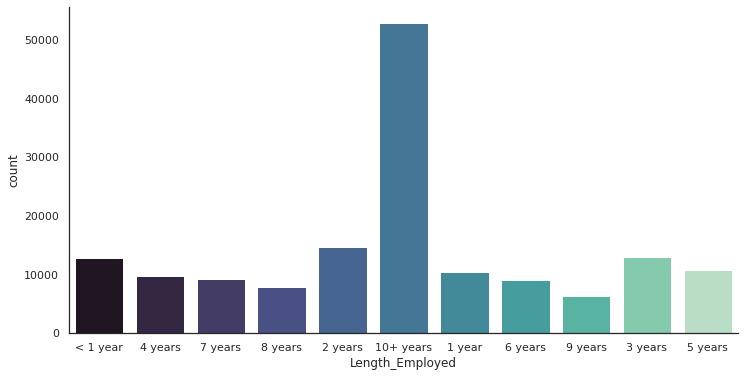

In [ ]:
sns.countplot(x='Length_Employed',data=loans,palette='mako')
sns.despine()

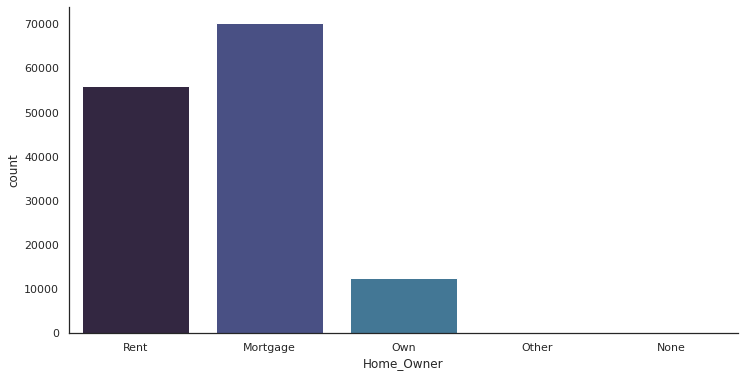

In [ ]:
sns.countplot(x='Home_Owner',data=loans,palette='mako')
sns.despine()

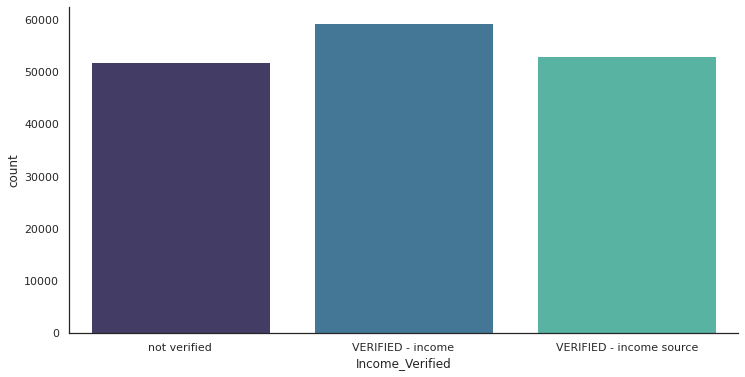

In [ ]:
sns.countplot(x='Income_Verified',data=loans,palette='mako')
sns.despine()

In [ ]:
loans['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

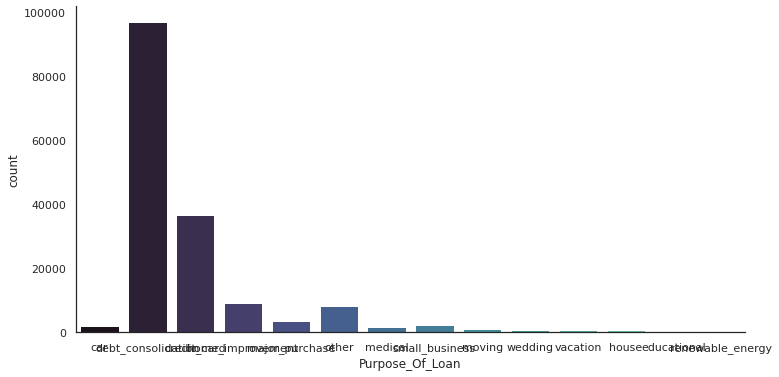

In [ ]:
sns.countplot(x='Purpose_Of_Loan',data=loans,palette='mako')
sns.despine()

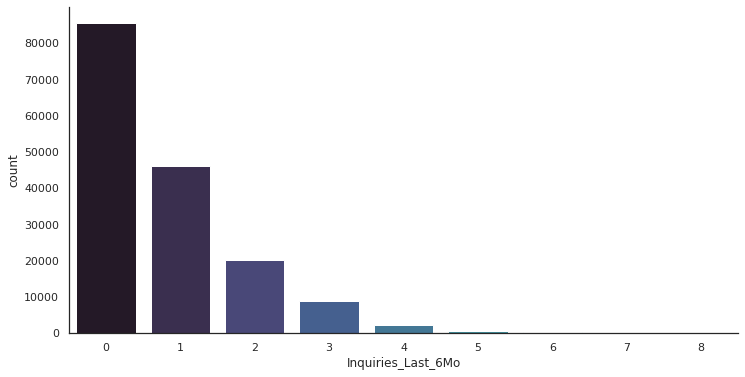

In [ ]:
sns.countplot(x='Inquiries_Last_6Mo',data=loans,palette='mako')
sns.despine()

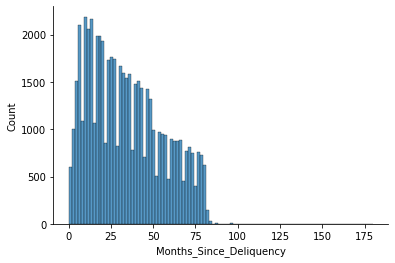

In [ ]:
sns.histplot(x='Months_Since_Deliquency',data=loans,palette='mako')
sns.despine()

(array([20483.,     0.,     0.,     0.,     0., 18982.,     0.,     0.,
            0., 17727.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

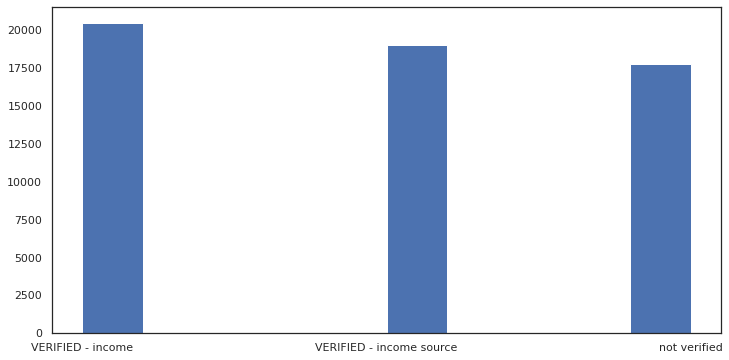

In [ ]:
g_12 = loans[loans['Months_Since_Deliquency']>15]
plt.hist(g_12['Income_Verified'])

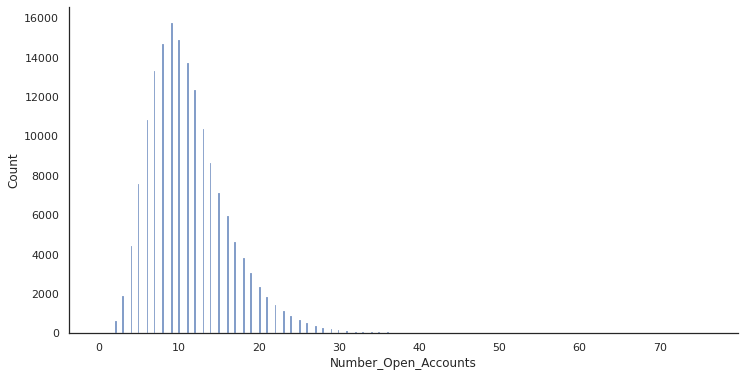

In [ ]:
sns.histplot(x='Number_Open_Accounts',data=loans,palette='mako')
sns.despine()

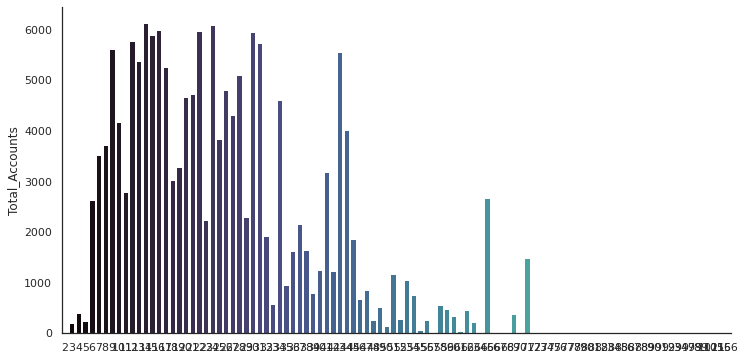

In [ ]:
label = loans['Total_Accounts']
sns.barplot(x=label.unique(),y=label.value_counts(),data=loans,palette='mako')
sns.despine()

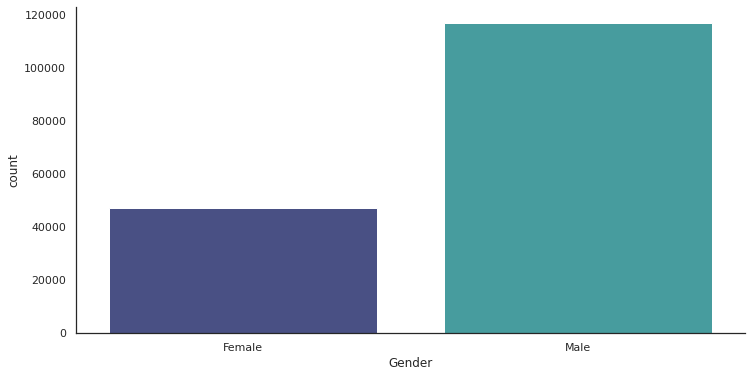

In [ ]:
sns.countplot(x='Gender',data=loans,palette='mako')
sns.despine()

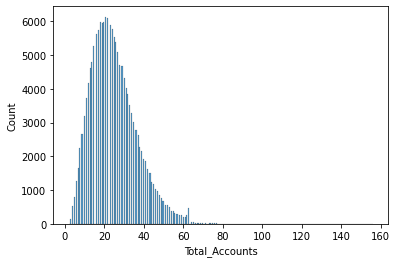

In [ ]:
sns.histplot(loans['Total_Accounts'])

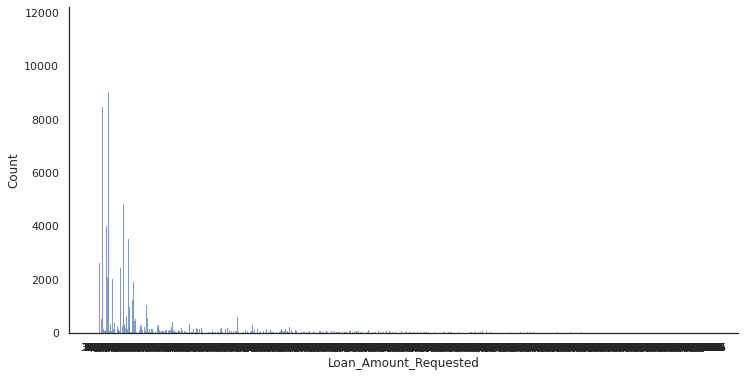

In [ ]:
sns.histplot(x='Loan_Amount_Requested',data=loans,palette='mako',bins=30)
sns.despine()

In [ ]:
(loans['Loan_Amount_Requested'].unique()).len()

AttributeError: ignored

In [ ]:
plt.hist(loans[''])

# Xtra

In [ ]:
loans

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3
